In [1]:
install.packages('MatrixEQTL', repos='http://cran.us.r-project.org')

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [2]:
require("MatrixEQTL")

Loading required package: MatrixEQTL


In [93]:
#log_normalize the expression data

data = read.csv("~/Work/testGeneexpreesion.txt",sep='\t',row.names =1)
data.log = log(data[,1:44]+1)
#data.log

#data
#write.table(x, file = "", append = FALSE, quote = TRUE, sep = " ",
#            eol = "\n", na = "NA", dec = ".", row.names = TRUE,
#            col.names = TRUE, qmethod = c("escape", "double"),
#            fileEncoding = "")
lognormedExpressionfile = paste("~/Work/testGeneexpreesion.txt","lognorm",sep='.')
write.table(data.log, file = lognormedExpressionfile,quote=FALSE, sep ='\t')

In [91]:
paste("~/Work/testGeneexpreesion.txt","lognorm",sep='.')

[1] "~/Work/testGeneexpreesion.txt.lognorm"

In [24]:
library(MatrixEQTL)

base.dir = find.package('MatrixEQTL');
useModel = modelLINEAR

In [129]:
# Linear model to use, modelANOVA, modelLINEAR, or modelLINEAR_CROSS
useModel = modelLINEAR; # modelANOVA, modelLINEAR, or modelLINEAR_CROSS

# Genotype file name
#SNP_file_name = paste(base.dir, "/data/SNP.txt", sep="");
#snps_location_file_name = paste(base.dir, "/data/snpsloc.txt", sep="");
SNP_file_name = "~/Work/testGenotype.txt";
snps_location_file_name = "~/Work/testSNP_locations.txt";

# Gene expression file name
#expression_file_name = paste(base.dir, "/data/GE.txt", sep="");
#gene_location_file_name = paste(base.dir, "/data/geneloc.txt", sep="");
expression_file_name = lognormedExpressionfile;
gene_location_file_name = "~/Work/testGenelocations.txt";

# Covariates file name
# Set to character() for no covariates
#covariates_file_name = paste(base.dir, "/data/Covariates.txt", sep="");
covariates_file_name =  "~/Work/testCovariate.txt";
table = read.csv(covariates_file_name,sep='\t')
L = unname(unlist(table))
if (0 %in% L) {covariates_file_name = covariates_file_name} 
covariates_file_name = character()

# Output file name
output_file_name_cis = "~/Work/CHOL_eqtl_cis.tsv";
output_file_name_tra = "~/Work/CHOL_eqtl_trans.tsv";

# Only associations significant at this level will be saved
pvOutputThreshold_cis = 2e-3;
pvOutputThreshold_tra = 1e-3;

# Error covariance matrix
# Set to numeric() for identity.
errorCovariance = numeric();
# errorCovariance = read.table("Sample_Data/errorCovariance.txt");

# Distance for local gene-SNP pairs
cisDist = 1e6;

In [95]:
#Load SNP data (Load genotype data)

snps = SlicedData$new();
snps$fileDelimiter = "\t";      # the TAB character
snps$fileOmitCharacters = "NA"; # denote missing values;
snps$fileSkipRows = 1;          # one row of column labels
snps$fileSkipColumns = 1;       # one column of row labels
snps$fileSliceSize = 2000;      # read file in slices of 2,000 rows
snps$LoadFile(SNP_file_name);


Rows read:  2,000 
Rows read:  4,000 
Rows read:  5218  done.


In [96]:

## Load gene expression data

gene = SlicedData$new();
gene$fileDelimiter = "\t";      # the TAB character
gene$fileOmitCharacters = "NA"; # denote missing values;
gene$fileSkipRows = 1;          # one row of column labels
gene$fileSkipColumns = 1;       # one column of row labels
gene$fileSliceSize = 2000;      # read file in slices of 2,000 rows
gene$LoadFile(expression_file_name);

Rows read:  2,000 
Rows read:  4,000 
Rows read:  6,000 
Rows read:  8,000 
Rows read:  10,000 
Rows read:  12,000 
Rows read:  14,000 
Rows read:  16,000 
Rows read:  18,000 
Rows read:  18864  done.


In [97]:


## Load covariates

cvrt = SlicedData$new();
cvrt$fileDelimiter = "\t";      # the TAB character
cvrt$fileOmitCharacters = "NA"; # denote missing values;
cvrt$fileSkipRows = 1;          # one row of column labels
cvrt$fileSkipColumns = 1;       # one column of row labels
if(length(covariates_file_name)>0) {
cvrt$LoadFile(covariates_file_name);
}

Rows read:  1  done.


In [98]:
snpspos = read.table(snps_location_file_name, header = TRUE, stringsAsFactors = FALSE);
genepos = read.table(gene_location_file_name, header = TRUE, stringsAsFactors = FALSE);

In [99]:
me = Matrix_eQTL_main(
snps = snps, 
gene = gene, 
cvrt = cvrt,
output_file_name     = output_file_name_tra,
pvOutputThreshold     = pvOutputThreshold_tra,
useModel = useModel, 
errorCovariance = errorCovariance, 
verbose = TRUE, 
output_file_name.cis = output_file_name_cis,
pvOutputThreshold.cis = pvOutputThreshold_cis,
snpspos = snpspos, 
genepos = genepos,
cisDist = cisDist,
pvalue.hist = "qqplot",
min.pv.by.genesnp = FALSE,
noFDRsaveMemory = FALSE);


unlink(output_file_name_tra);
unlink(output_file_name_cis);

Matching data files and location files 
18864 of 18864  genes matched
5218 of 5218  SNPs matched
Task finished in  0.035  seconds
Reordering genes
 
Task finished in  0.385  seconds
Processing covariates 
Task finished in  0.003  seconds
Processing gene expression data (imputation, residualization, etc.) 
Task finished in  0.09  seconds
Creating output file(s) 
Task finished in  0.037  seconds
Performing eQTL analysis 
 3.33% done, 249 cis-eQTLs, 52,951 trans-eQTLs
 6.66% done, 422 cis-eQTLs, 102,814 trans-eQTLs
10.00% done, 598 cis-eQTLs, 157,324 trans-eQTLs
13.33% done, 654 cis-eQTLs, 205,971 trans-eQTLs
16.66% done, 253,136 trans-eQTLs
20.00% done, 301,424 trans-eQTLs
23.33% done, 345,720 trans-eQTLs
26.66% done, 393,316 trans-eQTLs
29.99% done, 440,539 trans-eQTLs
33.33% done, 467,205 trans-eQTLs
36.66% done, 521,788 trans-eQTLs
40.00% done, 572,364 trans-eQTLs
43.33% done, 628,690 trans-eQTLs
46.66% done, 748 cis-eQTLs, 677,845 trans-eQTLs
50.00% done, 945 cis-eQTLs, 724,689 trans

Analysis done in:  19.407  seconds 
Detected local eQTLs: 


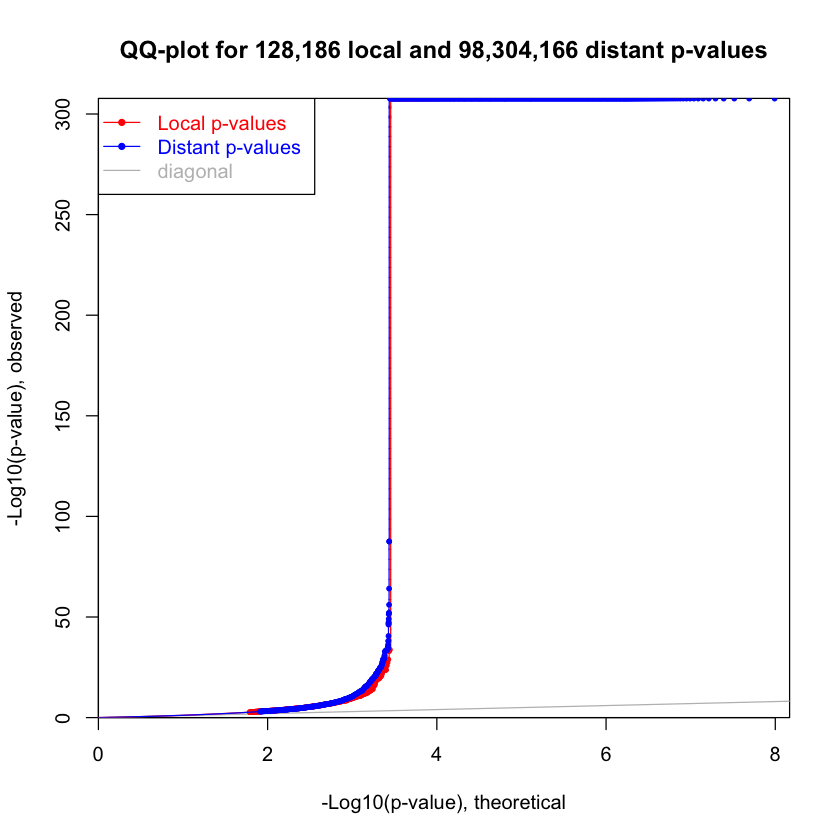

In [100]:
#print results 
write.table(me$cis$eqtls,file = output_file_name_cis,sep='\t',quote=FALSE)
write.table(me$trans$eqtls,file = output_file_name_tra,sep='\t',quote=FALSE)


## Results:

cat('Analysis done in: ', me$time.in.sec, ' seconds', '\n');
cat('Detected local eQTLs:', '\n');
#show(me$cis$eqtls)
#cat('Detected distant eQTLs:', '\n');
#show(me$trans$eqtls)

## Plot the Q-Q plot of local and distant p-values

plot(me)

In [86]:
me$cis$eqtls

snps,gene,statistic,pvalue,FDR,beta
snp_CHOL_291,LCE1F,Inf,2.225074e-308,6.338296e-305,0.9145693
snp_CHOL_323,SNORA42,Inf,2.225074e-308,6.338296e-305,0.4350239
snp_CHOL_324,SNORA42,Inf,2.225074e-308,6.338296e-305,0.4350239
snp_CHOL_332,SNORA42,Inf,2.225074e-308,6.338296e-305,0.4350239
snp_CHOL_341,OR10T2,429706394,2.225074e-308,6.338296e-305,0.8102189
snp_CHOL_344,OR10T2,429706394,2.225074e-308,6.338296e-305,0.8102189
snp_CHOL_553,OR2L2,429706394,2.225074e-308,6.338296e-305,0.4850154
snp_CHOL_547,OR2M4,Inf,2.225074e-308,6.338296e-305,1.5477114
snp_CHOL_552,OR2T4,Inf,2.225074e-308,6.338296e-305,0.4272266
snp_CHOL_553,OR2T3,429706394,2.225074e-308,6.338296e-305,0.4850154


id,TCGA.3X.AAV9.01A,TCGA.3X.AAVA.01A,TCGA.3X.AAVB.01A,TCGA.3X.AAVC.01A,TCGA.3X.AAVE.01A,TCGA.4G.AAZO.01A,TCGA.4G.AAZT.01A,TCGA.W5.AA2G.01A,TCGA.W5.AA2H.01A,⋯,TCGA.YR.A95A.01A,TCGA.ZD.A8I3.01A,TCGA.ZH.A8Y1.01A,TCGA.ZH.A8Y2.01A,TCGA.ZH.A8Y4.01A,TCGA.ZH.A8Y5.01A,TCGA.ZH.A8Y6.01A,TCGA.ZH.A8Y8.01A,TCGA.ZU.A8S4.01A,TCGA.ZU.A8S4.11A
mutation,1,1,1,1,1,1,1,1,1,⋯,1,1,1,1,1,1,1,1,1,0


In [132]:
!0 %in% L

[1] FALSE